In [1]:
import cmlreaders as cml
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings; warnings.simplefilter('ignore')
pd.options.display.max_columns=None
pd.options.display.max_rows=100
from IPython.display import display, Markdown, HTML
import pandas_to_pybeh as pb
from tqdm import tqdm_notebook as lol
import time
import scipy
import rep_pybeh as rpb
from plotting import *
error_bars ={'elinewidth':3, 'capsize':5, 'capthick':3}
data_set = 'hospital'

In [2]:
scalp = pd.read_csv('scalp_sem_crp.csv', index_col = 0)
hosp = pd.read_csv('hospital_sem_crp.csv', index_col = 0)
mturk = pd.read_csv('mturk_sem_crp.csv', index_col = 0)


In [3]:
def plot_sem_crp(alls_crp, data_set, marker, color):
    alls_crp['avg_sem_bin_mean'] = alls_crp.groupby('sem_bin')['sem_bin_mean'].transform('mean')
    g = sns.lineplot(data=alls_crp, x='avg_sem_bin_mean', y='prob', linewidth = 3,
                     color = color, err_style = 'bars', err_kws=error_bars, zorder=0)
    g = sns.scatterplot(data=alls_crp.groupby('avg_sem_bin_mean').mean().reset_index(), x='avg_sem_bin_mean', y='prob',
                     color = color, s= 50, label = data_set, edgecolor="black", zorder=10, marker= marker)
    plt.ylabel('Conditional Reponse \nProbability', fontsize = 30)
    plt.xlabel('Average Semantic Bin Mean')

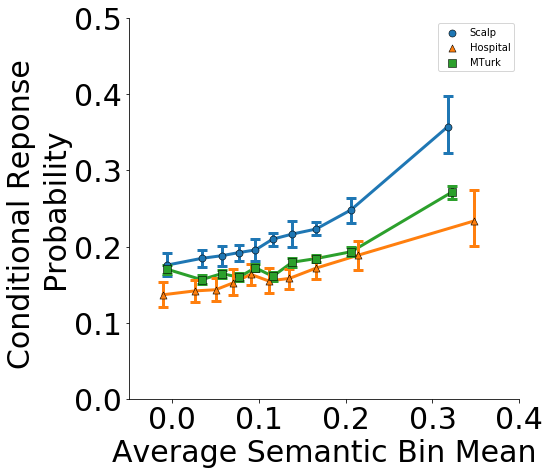

In [4]:
set_axes(ylim=[0, 0.5], xlim = [-0.05, 0.4], xticks=np.arange(0, 0.41, 0.1), fontsize = 30)

plot_sem_crp(scalp, 'Scalp', 'o', 'C0')
plot_sem_crp(hosp, 'Hospital', '^', 'C1')
plot_sem_crp(mturk, 'MTurk', 's', 'C2')
plt.savefig('all_studies_sem_crp.pdf', bbox_inches= 'tight')